# **Task 4.3**

- Load dataset
    - Use Blood-Brain Barrier dataset (see also caret datasets). Try to understand the research question. 
- Split the dataset
    - Use train_test_split() to create 75% training and 25% test sets.
- Select a learning method
    - Use RandomForestRegressor from sklearn.ensemble.
    - Apply preprocessing (scaling/centering) if needed.
- (Optional) Define a tuning grid
    - Use GridSearchCV to tune hyperparameters (e.g., n_estimators, max_depth, mtry).
- Perform 10-fold cross-validation
    - Use cross_val_score or define cv=10 inside GridSearchCV.
- Analyze performance values
    - Print model performance metrics and feature importances (model.feature_importances_).
- Apply the final model to the test set
    - Use predict() to make predictions on the test data.
    - Evaluate performance using mean_squared_error, r2_score, or similar metrics.
    - If preprocessing was used, apply the same transformation to the test set before prediction.


In [9]:
# Preparations

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

bloodBrain_df = pd.read_csv('BloodBrain.csv')
bloodBrain_df.head()

print("Dataset summary:")
print(f"Number of samples: {bloodBrain_df.shape[0]}")
print(f"Number of features: {bloodBrain_df.shape[1] - 1}")


# Splitting the dataset using train_test_split

X = bloodBrain_df.drop('logBBB', axis=1) 
y = bloodBrain_df['logBBB']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print(f"\n\nAufteilung in Training- und Test-Dataset:")
print(f"Training Dataset: {X_train.shape[0]} samples")
print(f"Test Dataset: {X_test.shape[0]} samples")

Dataset summary:
Number of samples: 208
Number of features: 134


Aufteilung in Training- und Test-Dataset:
Training Dataset: 156 samples
Test Dataset: 52 samples


In [11]:
#Selecting a learning method (this part was solved using claude.ai)

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardisierung der Features 
    ('rf', RandomForestRegressor(random_state=42))  # Methode zur Regression
    ])

In [ ]:
#Defining a tuning grid for hyperparameters (this part was solved using claude.ai)

param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__max_features': ['sqrt', 'log2', None]
}

In [15]:
#Performing 10-fold cross-validation and Analyzing Performance values (this part was solved using claude.ai)

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=10,  # 10-fold cross-validation
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)


# Fit the grid search model
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("\nBest parameters:", grid_search.best_params_)
print(f"Best cross-validation score (neg_MSE): {grid_search.best_score_:.4f}")

#Step 6: Analyze the performance and feature importance
best_model = grid_search.best_estimator_
print("\nCross-validation scores:")
cv_scores = cross_val_score(
    best_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error'
)
print(f"Mean CV MSE: {-cv_scores.mean():.4f}")
print(f"Standard deviation of CV MSE: {cv_scores.std():.4f}")

# Extract feature importances
feature_importances = best_model.named_steps['rf'].feature_importances_
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

print("\nFeature importances:")
print(features_df)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits

Best parameters: {'rf__max_depth': 10, 'rf__max_features': 'sqrt', 'rf__min_samples_split': 5, 'rf__n_estimators': 50}
Best cross-validation score (neg_MSE): -0.2579

Cross-validation scores:
Mean CV MSE: 0.2579
Standard deviation of CV MSE: 0.0875

Feature importances:
                  Feature  Importance
76   most_positive_charge    0.044654
93                  fnsa3    0.038150
0                    tpsa    0.037195
71                   tcnp    0.036109
103                  rpcg    0.036038
..                    ...         ...
125                  ctdh    0.000028
57                  hbdnr    0.000020
2                negative    0.000000
63                  inthb    0.000000
59                  alert    0.000000

[134 rows x 2 columns]



Test set performance:
Mean Squared Error (MSE): 0.2652
Root Mean Squared Error (RMSE): 0.5150
R-squared (R²): 0.3656
Mean Absolute Error (MAE): 0.3944


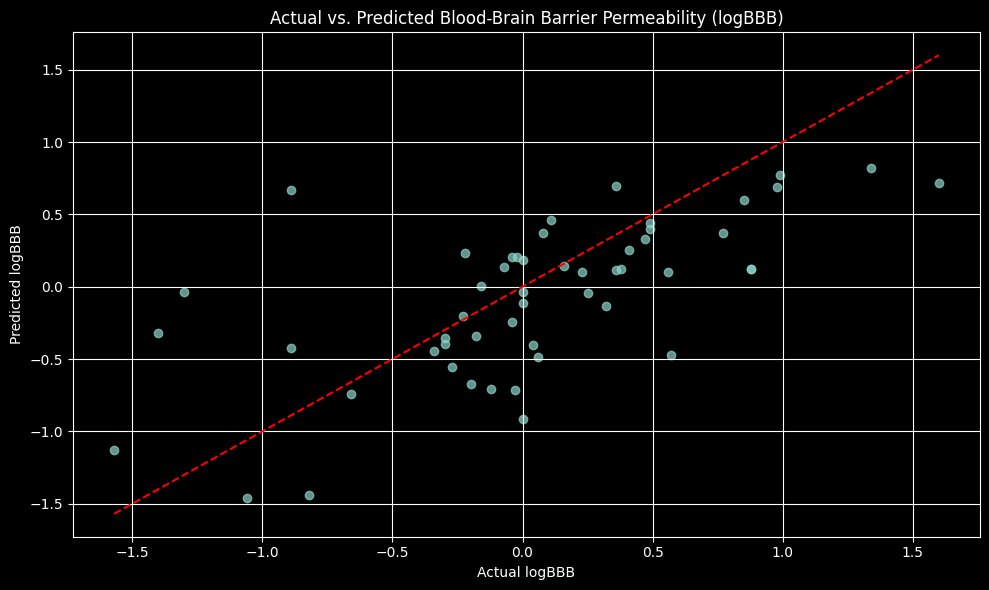

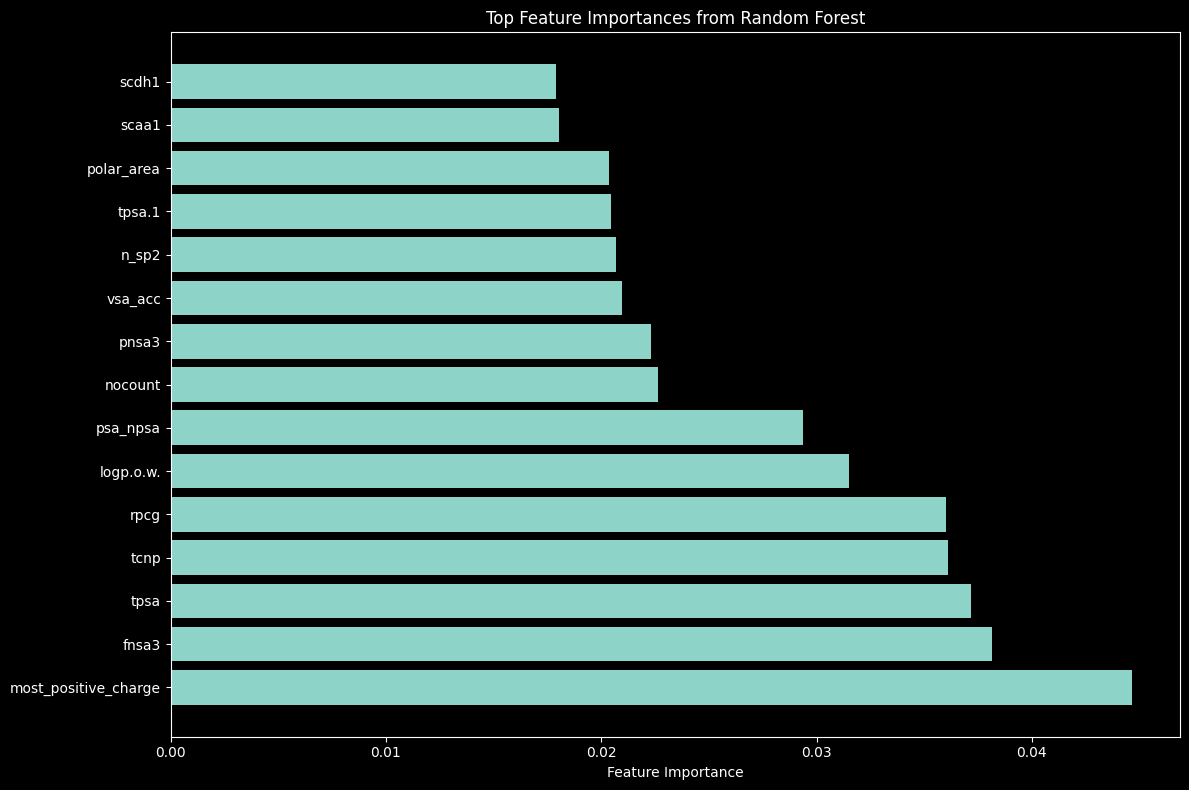

In [16]:
# Applying the final model to the test data set (this part was solved using claude.ai)

# Step 7: Apply the final model to the test set

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

y_pred = best_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\nTest set performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Step 8: Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual logBBB')
plt.ylabel('Predicted logBBB')
plt.title('Actual vs. Predicted Blood-Brain Barrier Permeability (logBBB)')
plt.grid(True)
plt.tight_layout()

# Step 9: Visualize feature importances
plt.figure(figsize=(12, 8))
# Plot top 15 features (or all if fewer than 15)
num_features_to_plot = min(15, len(features_df))
top_features = features_df.head(num_features_to_plot)
plt.barh(np.arange(num_features_to_plot), top_features['Importance'], align='center')
plt.yticks(np.arange(num_features_to_plot), top_features['Feature'])
plt.xlabel('Feature Importance')
plt.title('Top Feature Importances from Random Forest')
plt.tight_layout()


Interpretation

Test set performance:           
Mean Squared Error (MSE): 0.2652            -> die Vorhersagen des Modells weichen durchschnittlich ca. 0,26 von den tatsächlichen Werten ab
Root Mean Squared Error (RMSE): 0.5150      -> die Vorhersagen des Modells weichen durchschnittlich ca. 0,52 von den tatsächlichen Werten ab. Da die         logBBB-werte relativ gering sind, ist das ein hoher Fehlerwert
R-squared (R²): 0.3656                      -> Das Modell erklärt ca. 36,56% der Varianz in den logBBB-Werten. Dies ist ein relativ geringer Wert.
Mean Absolute Error (MAE): 0.3944           -> Die Vorhersagen weichen ca. 0,39 logEinheiten von den tatsäclichen Werten ab